In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 77.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd 
import nltk
import matplotlib.pyplot as plt
from sklearn.utils import resample
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from transformers import RobertaTokenizer
from transformers import TFRobertaModel, RobertaModel
from transformers import RobertaForSequenceClassification, RobertaConfig

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Flatten
from sklearn.metrics import precision_recall_curve

import tensorflow as tf
from sklearn.metrics import roc_auc_score, roc_curve,auc
from keras import regularizers
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,f1_score,classification_report
# from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score
from itertools import cycle
import torch
import torch.nn.functional as F

lemma = WordNetLemmatizer()
# stopword = set(STOPWORDS)
nltk.download('omw-1.4')
%matplotlib inline
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')


from nltk.corpus import brown
nltk.download("brown")
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [4]:
data = pd.read_csv('dataset.csv', encoding='ISO-8859-1')
data

,ID,AuthorID,Author,Date,Content,Words,"Change in appetite, losing or gaining weight",Sleeping too much or not sleeping well (insomnia),Fatigue and low energy most days,"Feeling worthless, guilty, and hopeless","An inability to focus and concentrate that may interfere with daily tasks at home, work, or school",Movements that are unusually slow or agitated (a change which is often noticeable to others),Thinking about death and dying; suicidal ideation or suicide attempts,None
0,1,4.560000e+17,Deleted User#0000,43630.77639,**List of International Suicide Hotlines**\n``...,72,N,N,N,N,N,N,N,Y
1,2,4.560000e+17,Deleted User#0000,43630.78611,"Hello, if you're depressed, being self-depreca...",56,N,N,N,Y,N,N,Y,N
2,3,4.680000e+17,angel?#5373,43630.84306,Please note that we are not professionals. Th...,61,N,N,N,N,N,N,N,Y
3,4,5.450000e+17,Sease#2410,43630.84514,yeah and people who just want attention don't ...,36,N,N,N,N,N,N,N,Y
4,5,3.030000e+17,Emma/Blue#2035,43630.85347,Just a small vent my arm hurts so much i know ...,41,N,N,N,Y,Y,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23989,23995,3.110000e+17,AfonsoHackers#6969,44071.59167,> And it's just getting so annoying and I'm so...,26,N,N,N,N,N,N,N,Y
23990,23996,6.460000e+17,sluttywhoreï£¿Ã¼Â¶Â¶#3156,44071.59236,And I'm mixed so I get called the n word with ...,18,N,N,N,Y,N,N,N,N
23991,23997,7.240000e+17,SAD BHABHIE.#3636,44071.59236,> @SAD BHABHIE. oof that's a good thing I supp...,50,N,N,N,N,N,N,N,Y
23992,23998,7.240000e+17,SAD BHABHIE.#3636,44071.59236,> And I'm mixed so I get called the n word wit...,21,N,N,N,Y,N,N,N,N


In [5]:
def clean_text2(text):
     # Remove anything that comes after "@"
    text = re.sub(r'@.*$', '', text)
     # Keep only letters, numbers, and grammatical marks
    text = re.sub(r'[^a-zA-Z0-9\s\.\?\!,]', '', text)
    return text

 # Apply the clean_text function to the "text" column of the dataset
data['Content'] = data['Content'].apply(clean_text)

 # Delete certain columns and the first row of data
columns_to_delete = ['ID', 'AuthorID', 'Author', 'Date', 'Words']
data = data.drop(columns=columns_to_delete)
# delete first row
data = data.iloc[1:]

for column in data.columns:
    if column != 'Content':
       data[column] = data[column].replace({'N': 0, 'Y': 1})
        
# Convert all non-"Contents" columns to integers
for column in data.columns:
     if column != 'Content':
         data[column] = pd.to_numeric(data[column], errors='coerce').astype('Int64')
        
# Save the cleaned dataset to a new CSV file
data.to_csv('./cleaned_dataset.csv', index=False)

In [6]:
data.head()

,Content,"Change in appetite, losing or gaining weight",Sleeping too much or not sleeping well (insomnia),Fatigue and low energy most days,"Feeling worthless, guilty, and hopeless","An inability to focus and concentrate that may interfere with daily tasks at home, work, or school",Movements that are unusually slow or agitated (a change which is often noticeable to others),Thinking about death and dying; suicidal ideation or suicide attempts,None
1,"Hello, if youre depressed, being selfdeprecati...",0,0,0,1,0,0,1,0
2,Please note that we are not professionals. Th...,0,0,0,0,0,0,0,1
3,yeah and people who just want attention dont a...,0,0,0,0,0,0,0,1
4,Just a small vent my arm hurts so much i know ...,0,0,0,1,1,1,0,0
5,They do where I live I had to call 911 before ...,0,0,0,0,0,0,0,1


In [7]:
data = data.rename(columns={'Change in appetite, losing or gaining weight': 'symptom_1'})
data = data.rename(columns={'Sleeping too much or not sleeping well (insomnia)': 'symptom_2'})
data = data.rename(columns={'Fatigue and low energy most days': 'symptom_3'})
data = data.rename(columns={'Feeling worthless, guilty, and hopeless': 'symptom_4'})
data = data.rename(columns={'An inability to focus and concentrate that may interfere with daily tasks at home, work, or school': 'symptom_5'})
data = data.rename(columns={'Movements that are unusually slow or agitated (a change which is often noticeable to others)': 'symptom_6'})
data = data.rename(columns={'Thinking about death and dying; suicidal ideation or suicide attempts': 'symptom_7'})

In [8]:
data.head()

,Content,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,None
1,"Hello, if youre depressed, being selfdeprecati...",0,0,0,1,0,0,1,0
2,Please note that we are not professionals. Th...,0,0,0,0,0,0,0,1
3,yeah and people who just want attention dont a...,0,0,0,0,0,0,0,1
4,Just a small vent my arm hurts so much i know ...,0,0,0,1,1,1,0,0
5,They do where I live I had to call 911 before ...,0,0,0,0,0,0,0,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23993 entries, 1 to 23993
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Content    23993 non-null  object
 1   symptom_1  23981 non-null  Int64 
 2   symptom_2  23984 non-null  Int64 
 3   symptom_3  23988 non-null  Int64 
 4   symptom_4  23985 non-null  Int64 
 5   symptom_5  23988 non-null  Int64 
 6   symptom_6  23987 non-null  Int64 
 7   symptom_7  23985 non-null  Int64 
 8   None       23980 non-null  Int64 
dtypes: Int64(8), object(1)
memory usage: 1.8+ MB


In [10]:
data.drop_duplicates(subset='Content',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21833 entries, 1 to 23993
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Content    21833 non-null  object
 1   symptom_1  21822 non-null  Int64 
 2   symptom_2  21824 non-null  Int64 
 3   symptom_3  21828 non-null  Int64 
 4   symptom_4  21825 non-null  Int64 
 5   symptom_5  21828 non-null  Int64 
 6   symptom_6  21827 non-null  Int64 
 7   symptom_7  21825 non-null  Int64 
 8   None       21820 non-null  Int64 
dtypes: Int64(8), object(1)
memory usage: 1.8+ MB


In [11]:
data = data.dropna()
data = data.sample(frac=1).reset_index(drop=True)

In [12]:
data_train = data.copy()

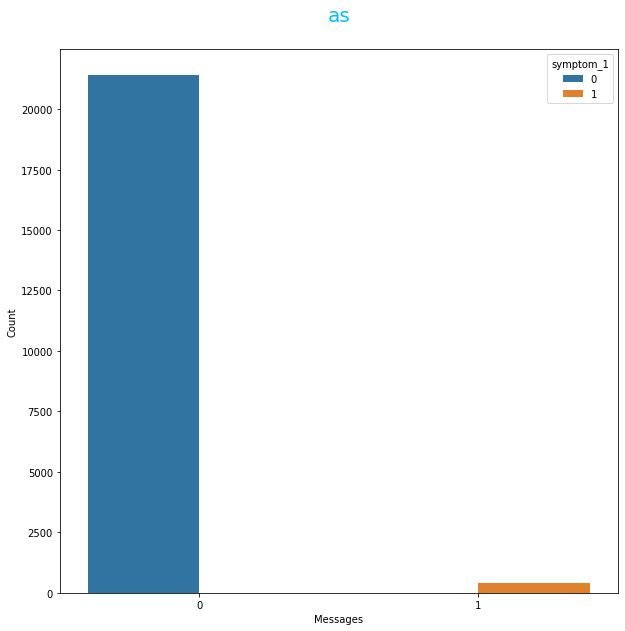

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(data=data_train, x='symptom_1', hue='symptom_1')
plt.title("as\n",fontsize=20,color="deepskyblue")
plt.xlabel('Messages')
plt.ylabel("Count")
plt.show()

In [14]:
def clean_text(tweet):
    content = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    content = re.sub('[^a-zA-Z]', ' ', content)
    content = content.lower()
    content = content.split()
    content = [word for word in content if not word in set(stopwords.words('english'))]
    content = [lemma.lemmatize(word) for word in content]
    content = " ".join(content)
    return content

In [15]:
data_train['clean_text'] = data_train.Content.apply(clean_text)
data_train=data_train.drop(["Content"],axis=1)

In [16]:
data_train.head()

,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,None,clean_text
0,0,0,0,0,0,0,0,1,believe know u truth probably
1,0,0,0,1,0,0,0,0,im sorry coming time need rant uhm parent make...
2,0,0,0,0,0,0,0,0,try make new friend like talk almost break cuz...
3,0,0,0,1,1,0,0,0,dont know soon think thing get really upset sad
4,0,0,0,0,1,0,0,0,cant really anything pray frog think he dying ...


<BarContainer object of 2 artists>

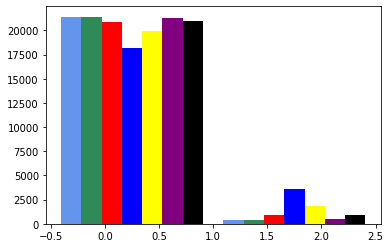

In [17]:
ig, ax = plt.subplots()

d_heights, d_bins = np.histogram(data_train['symptom_1'],bins=[-0.5, 1, 2])
m_heights, m_bins = np.histogram(data_train['symptom_2'], bins=d_bins)
s_heights, s_bins = np.histogram(data_train['symptom_3'], bins=m_bins)
ss_heights, ss_bins = np.histogram(data_train['symptom_4'], bins=s_bins)
t_heights, t_bins = np.histogram(data_train['symptom_5'], bins=ss_bins)
te_heights, te_bins = np.histogram(data_train['symptom_6'], bins=t_bins)
tr_heights, tr_bins = np.histogram(data_train['symptom_7'], bins=te_bins)


width = (d_bins[1] - d_bins[0])/8.0

ax.bar(d_bins[:-1]+width, d_heights, width=width, facecolor='cornflowerblue')
ax.bar(m_bins[:-1]+width*2, m_heights, width=width, facecolor='seagreen')
ax.bar(s_bins[:-1]+width*3, s_heights, width=width, facecolor='red')
ax.bar(ss_bins[:-1]+width*4, ss_heights, width=width, facecolor='blue')
ax.bar(t_bins[:-1]+width*5, t_heights, width=width, facecolor='yellow')
ax.bar(te_bins[:-1]+width*6, te_heights, width=width, facecolor='purple')
ax.bar(tr_bins[:-1]+width*7, tr_heights, width=width, facecolor='black')

In [18]:
data_train['powerlabel'] = data_train.apply(lambda x : 6.4 * x['symptom_1'] + 3.2 * x['symptom_2'] + 1.6*x["symptom_3"] + 0.8 * x['symptom_4'] + 0.4 * x['symptom_5'] + 0.2 * x['symptom_6'] + 0.1 * x['symptom_7'],axis=1)

In [19]:
# data_train['powerlabel'].hist(bins=np.unique(data_train['powerlabel']))
data_train = data_train.sort_values(by=['powerlabel'], ascending=False)

In [20]:
data_train.head()

,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,None,clean_text,powerlabel
21120,1,1,1,1,1,1,0,0,goddamn pushed get shower make nice meal mothe...,12.6
11932,1,1,1,1,1,1,0,0,cant talk im fucking depressed dont feel like ...,12.6
13016,1,1,1,1,1,1,0,0,im sad im starting accept depression possibly ...,12.6
1196,1,1,1,1,1,1,0,0,work like cant take help doesnt except need fi...,12.6
3145,1,1,1,1,1,1,0,0,im probably letting brain get best im lowkey w...,12.6


In [21]:
powercount = {}
powerlabels = np.unique(data_train['powerlabel'])
for p in powerlabels:
    powercount[p] = np.count_nonzero(data_train['powerlabel'] == p)

maxcount = int(np.mean(list(powercount.values())))
new_data_train = pd.DataFrame()
desired_count = int(np.mean(list(powercount.values())))
for p in powerlabels:
    gapnum = maxcount - powercount[p]
    if gapnum <= 0:
        # gapnum = min(gapnum, int(desired_count * 0.2))  # Limit the number of duplicates
        temp_df = data_train[data_train['powerlabel'] == p]
    else:
        # gapnum = min(gapnum, int(desired_count * 0.7))  # Limit the number of samples to remove
        temp_df = data_train.iloc[np.random.choice(np.where(data_train['powerlabel'] == p)[0], size=gapnum, replace=True)]
    
    undersample_num = powercount[p] - maxcount
    if undersample_num <= 0:
        new_data_train = pd.concat([new_data_train, temp_df])
    else:
        temp_df = temp_df.sample(n=maxcount, replace=False)
        new_data_train = pd.concat([new_data_train, temp_df])
    
data_train = new_data_train.sample(frac=1).reset_index(drop=True)


<BarContainer object of 2 artists>

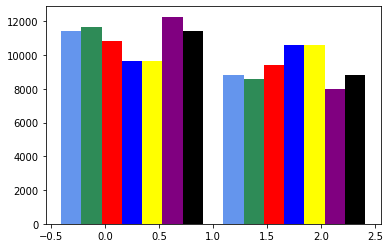

In [22]:
ig, ax = plt.subplots()

d_heights, d_bins = np.histogram(data_train['symptom_1'],bins=[-0.5, 1, 2])
m_heights, m_bins = np.histogram(data_train['symptom_2'], bins=d_bins)
s_heights, s_bins = np.histogram(data_train['symptom_3'], bins=m_bins)
ss_heights, ss_bins = np.histogram(data_train['symptom_4'], bins=s_bins)
t_heights, t_bins = np.histogram(data_train['symptom_5'], bins=ss_bins)
te_heights, te_bins = np.histogram(data_train['symptom_6'], bins=t_bins)
tr_heights, tr_bins = np.histogram(data_train['symptom_7'], bins=te_bins)


width = (d_bins[1] - d_bins[0])/8.0

ax.bar(d_bins[:-1]+width, d_heights, width=width, facecolor='cornflowerblue')
ax.bar(m_bins[:-1]+width*2, m_heights, width=width, facecolor='seagreen')
ax.bar(s_bins[:-1]+width*3, s_heights, width=width, facecolor='red')
ax.bar(ss_bins[:-1]+width*4, ss_heights, width=width, facecolor='blue')
ax.bar(t_bins[:-1]+width*5, t_heights, width=width, facecolor='yellow')
ax.bar(te_bins[:-1]+width*6, te_heights, width=width, facecolor='purple')
ax.bar(tr_bins[:-1]+width*7, tr_heights, width=width, facecolor='black')

In [23]:
data_train = data_train.drop(['powerlabel', 'None'], axis=1)
data_train.head()

,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,clean_text
0,1,0,0,1,1,0,0,there nothing worry youre getting worked somet...
1,0,0,0,0,1,1,0,ive contacted people trying nice eventually th...
2,0,1,1,1,0,1,0,feel bad dad prison never even seen stepdad al...
3,0,0,0,1,1,0,1,day workout constant negative thought telling ...
4,1,0,0,1,1,1,1,wanna disappear black pit loneliness rot slowl...


In [24]:
text_data=data_train["clean_text"]
label_data1=data_train["symptom_1"]
label_data2=data_train["symptom_2"]
label_data3=data_train["symptom_3"]
label_data4=data_train["symptom_4"]
label_data5=data_train["symptom_5"]
label_data6=data_train["symptom_6"]
label_data7=data_train["symptom_7"]

In [25]:
print("Length of Text Data :",len(text_data))
print("Length of Label Data :",len(label_data1))
print("Length of Label Data :",len(label_data2))
print("Length of Label Data :",len(label_data3))
print("Length of Label Data :",len(label_data4))
print("Length of Label Data :",len(label_data5))
print("Length of Label Data :",len(label_data6))
print("Length of Label Data :",len(label_data7))

Length of Text Data : 20247
Length of Label Data : 20247
Length of Label Data : 20247
Length of Label Data : 20247
Length of Label Data : 20247
Length of Label Data : 20247
Length of Label Data : 20247
Length of Label Data : 20247


In [26]:
X = data_train.clean_text.values
y = data_train[['symptom_1', 'symptom_2', 'symptom_3',
       'symptom_4', 'symptom_5', 'symptom_6', 'symptom_7']].values


In [27]:
X_train, X_val, y_train, y_val =train_test_split(X, y, test_size=0.2, random_state=2020)

In [28]:
X_train.shape

(16197,)

In [29]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("Zamachi/RoBERTa-for-multilabel-sentence-classification")

model = AutoModelForSequenceClassification.from_pretrained("Zamachi/RoBERTa-for-multilabel-sentence-classification")

In [30]:
final_text_data=data_train["clean_text"]

In [31]:
print(len(data_train.clean_text))

20247


In [32]:
def preprocessing_for_bert(data):
    # create empty lists to store outputs
    input_ids = []
    attention_masks = []
    
    #for every sentence...
    
    for sent in data:
        encoded_sent = tokenizer.encode_plus(
            text = sent,   #preprocess sentence
            add_special_tokens = True,         #Add `[CLS]` and `[SEP]`
            max_length= MAX_LEN  ,             #Max length to truncate/pad
            pad_to_max_length = True,          #pad sentence to max length 
            return_attention_mask= True        #Return attention mask 
        )
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))
        
    #convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)
    
    return input_ids, attention_masks

In [33]:
#Encode the concatenated data
len_sent = [len(sent) for sent in data_train.clean_text]

# Find the maximum length
avg_len = np.mean(len_sent)
print('Avg length: ',avg_len)

Avg length:  199.85415123228134


In [34]:
MAX_LEN = 128

# Print sentece 0 and its encoded token ids
token_ids = list(preprocessing_for_bert([X[0]])[0].squeeze().numpy())
print('Original: ',X[0])
print('Token IDs: ',token_ids)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Original:  there nothing worry youre getting worked something hasnt happened try take step back breathe focus fact wasnt received negative way c
Token IDs:  [0, 8585, 1085, 4022, 47, 241, 562, 1006, 402, 34, 3999, 1102, 860, 185, 1149, 124, 14575, 1056, 754, 21, 3999, 829, 2430, 169, 740, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [35]:
# Run function 'preprocessing_for_bert' on the train set and validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_val)

Tokenizing data...


In [36]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

In [37]:
train_inputs.shape

torch.Size([16197, 128])

In [38]:
train_masks.shape

torch.Size([16197, 128])

In [39]:
y_train.shape

(16197, 7)

In [40]:
# Convert other data types to torch.Tensor
# train_labels = torch.tensor(y_train)
# val_labels = torch.tensor(y_val)
train_labels = torch.tensor(y_train.astype('int64'))
val_labels = torch.tensor(y_val.astype('int64'))

## For fine-tuning Bert, the authors recommmend a batch size of 16 or 32
batch_size = 16

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs,train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

In [41]:
import torch.nn as nn
from transformers import AdamW, get_linear_schedule_with_warmup
import random
import time

In [42]:
%%time
# Create the BertClassifier class

class BertClassifier(nn.Module):
    """
        Bert Model for classification Tasks.
    """
    def __init__(self, freeze_bert=False):
        """
        @param   bert: a BertModel object
        @param   classifier: a torch.nn.Module classifier
        @param   freeze_bert (bool): Set `False` to fine_tune the Bert model
        """
        super(BertClassifier,self).__init__()
        # Specify hidden size of Bert, hidden size of our classifier, and number of labels
        D_in, H,D_out = 768,30,7
        
        self.bert = RobertaModel.from_pretrained('roberta-base')
        # self.bert = BertModel.from_pretrained("bert-base-uncased")
        
        self.classifier = nn.Sequential(
                            nn.Linear(D_in, H),
                            nn.ReLU(),
                            nn.Linear(H, D_out))
        self.sigmoid = nn.Sigmoid()
        # Freeze the Bert Model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
    
    def forward(self,input_ids,attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        outputs = self.bert(input_ids=input_ids,
                           attention_mask = attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:,0,:]
        
        # Feed input to classifier to compute logits
        logit = self.classifier(last_hidden_state_cls)
        
#         logits = self.sigmoid(logit)
        
        return logit

CPU times: user 26 µs, sys: 0 ns, total: 26 µs
Wall time: 28.8 µs


In [43]:
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")


There are 1 GPU(s) available.
Device name: Tesla T4


In [44]:
def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)
    
    bert_classifier.to(device)
    
    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                     lr=5e-5, #Default learning rate
                     eps=1e-8 #Default epsilon value
                     )
    
    # Total number of training steps
    total_steps = len(train_dataloader) * epochs
    
    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer, 
                                              num_warmup_steps=0, # Default value
                                              num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler


In [59]:
# Specify loss function
#loss_fn = nn.CrossEntropyLoss()
loss_fn = nn.BCEWithLogitsLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0
        
        # Put the model into the training mode
        model.train()
        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)
            model.zero_grad()
            logits = model(b_input_ids, b_attn_mask)
            # b_labels = b_labels.unsqueeze(1)
            loss = loss_fn(logits, b_labels.float())
            batch_loss += loss.item()
            total_loss += loss.item()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            scheduler.step()
            if (step % 50000 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                time_elapsed = time.time() - t0_batch
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()
        avg_train_loss = total_loss / len(train_dataloader)
        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            val_loss, val_accuracy = evaluate(model, val_dataloader)
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels.float())
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()
        # print(logits.size())
        # print(b_labels.size())
        # Calculate the accuracy rate
        # accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        # accuracy = accuracy_thresh(logits.view(-1,6),b_labels.view(-1,6))
        accuracy = accuracy_thresh(logits.view(-1,7),b_labels.view(-1,7))
        
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

def accuracy_thresh(y_pred, y_true, thresh:float=0.5, sigmoid:bool=True):
    "Compute accuracy when `y_pred` and `y_true` are the same size."
    if sigmoid: 
        y_pred = y_pred.sigmoid()
    return ((y_pred>thresh)==y_true.byte()).float().mean().item()
    #return np.mean(((y_pred>thresh).float()==y_true.float()).float().cpu().numpy(), axis=1).sum()

In [60]:
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=1)
train(bert_classifier, train_dataloader, val_dataloader, epochs=1, evaluation=True)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |  1012   |   0.292542   |     -      |     -     |  347.26  
----------------------------------------------------------------------
   1    |    -    |   0.292542   |  0.137391  |   0.97    |  373.46  
----------------------------------------------------------------------


Training complete!


In [61]:
def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    #probs = F.softmax(all_logits, dim=1).cpu().numpy()
    probs = all_logits.sigmoid().cpu().numpy()
    

    return probs

#probs = all_logits.sigmoid().cpu().numpy()

In [62]:
## Compute predicted probabilities on the test set

probs = bert_predict(bert_classifier,val_dataloader)

# Evalueate the bert classifier

# evaluate_roc(probs, y_val)

In [63]:
full_train_data = torch.utils.data.ConcatDataset([train_data, val_data])
full_train_sampler = RandomSampler(full_train_data)
full_train_dataloader = DataLoader(full_train_data, sampler=full_train_sampler, batch_size=batch_size)

# Train the Bert Classifier on the entire training data
set_seed(42)
bert_classifier, optimizer, scheduler = initialize_model(epochs=4)
train(bert_classifier, full_train_dataloader, epochs=1)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |  1265   |   0.238415   |     -      |     -     |  434.91  
----------------------------------------------------------------------


Training complete!


In [89]:
test = pd.read_csv('test.csv')
test

,text
0,I Just want her be ok and i would like give he...
1,But if she knows where she is going or if she...
2,yeah i have ignored it for 5 years now have yo...


In [90]:
## Run preprocessing_for_bert on the test set
print('Tokenizing data...')
test_inputs, test_masks = preprocessing_for_bert(test.text)

# Create the DataLoader for our test set
test_dataset = TensorDataset(test_inputs, test_masks)
#test_sampler = SequentialSampler(test_dataset)
#test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=32)
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=16)

Tokenizing data...


In [98]:
# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, test_dataloader)

# Get predictions from the probabilities
# threshold = 0.7 # Change depending on the accuracy you need
# preds = np.where(probs[:, 1] > threshold, 1, 0)

In [99]:
submission = pd.DataFrame(probs,columns=['symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5', 'symptom_6', 'symptom_7'])
test[['symptom_1', 'symptom_2', 'symptom_3','symptom_4', 'symptom_5', 'symptom_6', 'symptom_7']]=submission
final_sub = test[['symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5', 'symptom_6', 'symptom_7']]
final_sub.head()

,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7
0,0.007450,0.007882,0.163127,0.449571,0.252899,0.155595,0.093753
1,0.005077,0.009097,0.237683,0.044029,0.984278,0.221075,0.076366
2,0.006797,0.011400,0.127781,0.206221,0.885457,0.380062,0.014518


In [103]:
def check_thresold(thresold):
    for sub in final_sub:
        sub["symptom_1"] = [1 if n >= thresold else 0 for n in final_sub["symptom_1"]]
        sub["symptom_2"] = [1 if n >= thresold else 0 for n in final_sub["symptom_2"]]
        sub["symptom_3"] = [1 if n >= thresold else 0 for n in final_sub["symptom_3"]]
        sub["symptom_4"] = [1 if n >= thresold else 0 for n in final_sub["symptom_4"]]
        sub["symptom_5"] = [1 if n >= thresold else 0 for n in final_sub["symptom_5"]]
        sub["symptom_6"] = [1 if n >= thresold else 0 for n in final_sub["symptom_6"]]
        sub["symptom_7"] = [1 if n >= thresold else 0 for n in final_sub["symptom_7"]]
    
    final_sub